In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the cleaned dataset
df = pd.read_csv('../data_clean/training_dataset.csv')

# Separate features (X) and target (y)
X = df.drop(columns=['AQI'])  # Features
y = df['AQI']  # Target variable

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets successfully.")

Data split into training and testing sets successfully.


📊 XGBoost Regression Results:
🔹 Train R²: 0.9206
🔹 Test R²: 0.9008
🔹 MAE: 22.3126
🔹 MSE: 1575.0189
🔹 RMSE: 39.6865


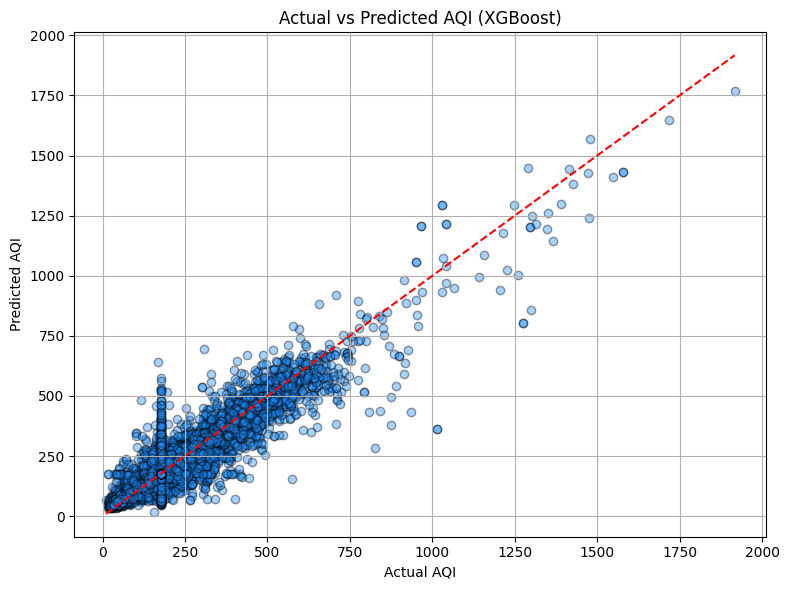

✅ Model saved as 'xgboost_model.pkl'


In [30]:
import matplotlib.pyplot as plt
import numpy as np
import joblib
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# --- Model ---
model = XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, y_train)

# --- Predict ---
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# --- Metrics ---
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

print("📊 XGBoost Regression Results:")
print(f"🔹 Train R²: {train_r2:.4f}")
print(f"🔹 Test R²: {test_r2:.4f}")
print(f"🔹 MAE: {mae:.4f}")
print(f"🔹 MSE: {mse:.4f}")
print(f"🔹 RMSE: {rmse:.4f}")

# --- Plot: Actual vs Predicted ---
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.4, color='dodgerblue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI (XGBoost)")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Save the Model ---
joblib.dump(model, 'xgboost_model.pkl')
print("✅ Model saved as 'xgboost_model.pkl'")

📊 Random Forest Regression Results:
🔹 Train R²: 0.9053
🔹 Test R²: 0.8869
🔹 MAE: 24.1794
🔹 MSE: 1796.3559
🔹 RMSE: 42.3834


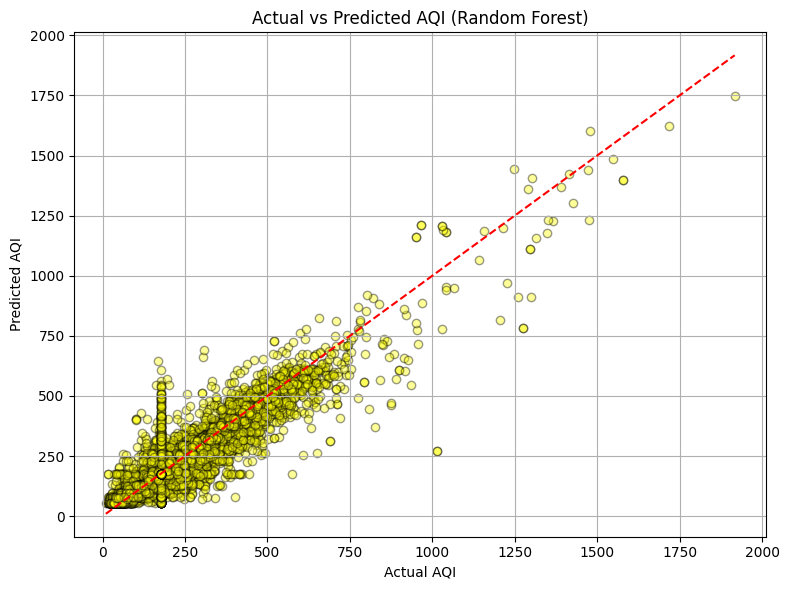

✅ Model saved as 'random_forest_model.pkl'


In [31]:
import matplotlib.pyplot as plt
import numpy as np
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# --- Model ---
model = RandomForestRegressor(
    n_estimators=100,
    max_depth=8,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)
model.fit(X_train, y_train)

# --- Predict ---
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# --- Metrics ---
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

print("📊 Random Forest Regression Results:")
print(f"🔹 Train R²: {train_r2:.4f}")
print(f"🔹 Test R²: {test_r2:.4f}")
print(f"🔹 MAE: {mae:.4f}")
print(f"🔹 MSE: {mse:.4f}")
print(f"🔹 RMSE: {rmse:.4f}")

# --- Plot: Actual vs Predicted ---
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.4, color='yellow', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI (Random Forest)")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Save the Model ---
joblib.dump(model, 'random_forest_model.pkl')
print("✅ Model saved as 'random_forest_model.pkl'")

📊 Polynomial Regression Results:
🔹 Train R²: 0.8354
🔹 Test R²: 0.8292
🔹 MAE: 31.6425
🔹 MSE: 2711.4652
🔹 RMSE: 52.0717


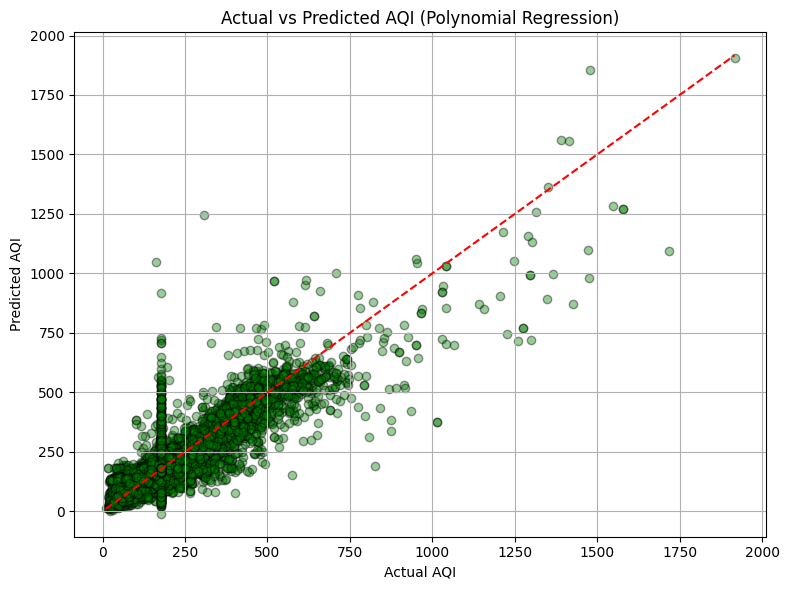

✅ Model saved as 'polynomial_regression_model.pkl'


In [32]:
import matplotlib.pyplot as plt
import numpy as np
import joblib
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import make_pipeline

# --- Model ---
# Create a pipeline with polynomial features (degree=2) and linear regression
model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
model.fit(X_train, y_train)

# --- Predict ---
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# --- Metrics ---
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

print("📊 Polynomial Regression Results:")
print(f"🔹 Train R²: {train_r2:.4f}")
print(f"🔹 Test R²: {test_r2:.4f}")
print(f"🔹 MAE: {mae:.4f}")
print(f"🔹 MSE: {mse:.4f}")
print(f"🔹 RMSE: {rmse:.4f}")

# --- Plot: Actual vs Predicted ---
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.4, color='green', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI (Polynomial Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Save the Model ---
joblib.dump(model, 'polynomial_regression_model.pkl')
print("✅ Model saved as 'polynomial_regression_model.pkl'")

📊 Linear Regression Results:
🔹 Train R²: 0.7859
🔹 Test R²: 0.7927
🔹 MAE: 35.6961
🔹 MSE: 3290.7718
🔹 RMSE: 57.3652


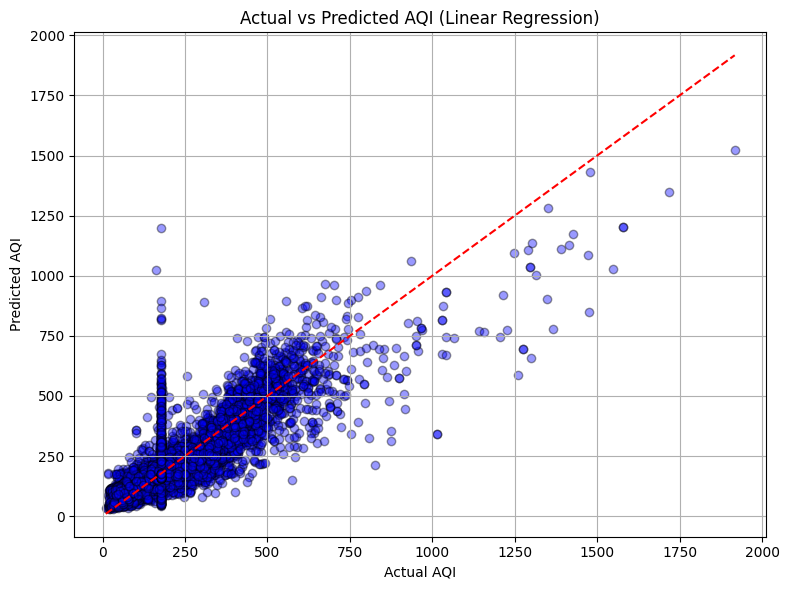

✅ Model saved as 'linear_regression_model.pkl'


In [33]:
import matplotlib.pyplot as plt
import numpy as np
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# --- Model ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- Predict ---
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# --- Metrics ---
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

print("📊 Linear Regression Results:")
print(f"🔹 Train R²: {train_r2:.4f}")
print(f"🔹 Test R²: {test_r2:.4f}")
print(f"🔹 MAE: {mae:.4f}")
print(f"🔹 MSE: {mse:.4f}")
print(f"🔹 RMSE: {rmse:.4f}")

# --- Plot: Actual vs Predicted ---
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.4, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI (Linear Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Save the Model ---
joblib.dump(model, 'linear_regression_model.pkl')
print("✅ Model saved as 'linear_regression_model.pkl'")